# Cinematic Coherence : A Correlation Study of Movie Dynamics Across 40 Years

## A Project by [Gaurab Kundu](https://linkedin.com/in/gaurab-kundu)

### Import Necessary Libraries

In [155]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 

pd.options.mode.chained_assignment = None

### Load Dataset

In [156]:
dataFrame = pd.read_csv('movies.csv')

### Quick View of Data

In [157]:
dataFrame.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

### Basic Data Exploration

In [158]:
dataFrame.describe()

year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000

In [159]:
dataFrame.shape

(7668, 15)

In [160]:
dataFrame.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

There are 7688 rows and 15 columns

### Data Cleaning

In [161]:
# Let's loop through the data and see % of missing values
for col in dataFrame.columns:
    pct_missing = np.mean(dataFrame[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [162]:
# let's drop rows with missing values 
dataFrame.dropna()
dataFrame = dataFrame.dropna()

After dropping rows with missing values we have 5421 rows and 15 columns

In [163]:
# Data types for columns

dataFrame.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [164]:
# transform data type of column with floating point numbers except "score"

dataFrame['votes'] = dataFrame['votes'].astype('int64')
dataFrame['budget'] = dataFrame['budget'].astype('int64')
dataFrame['gross'] = dataFrame['gross'].astype('int64')
dataFrame['runtime'] = dataFrame['runtime'].astype('int64')


In [165]:
dataFrame.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [166]:
# to display all the rows in the dataframe
pd.set_option('display.max_rows', None)

In [167]:
# to group "gross" column by descending order
dataFrame = dataFrame.sort_values(by=['gross'], inplace=False, ascending=False)

### Hypothesis Testing

* 1. Movie budget will have a high correlation with Movie Gross Earnings
* 2. Movie production company will have a high correlation with Movie Gross Earnings

#### <b> Hypothesis one </b>
* Movie budget will have a high correlation with Movie Gross Earnings

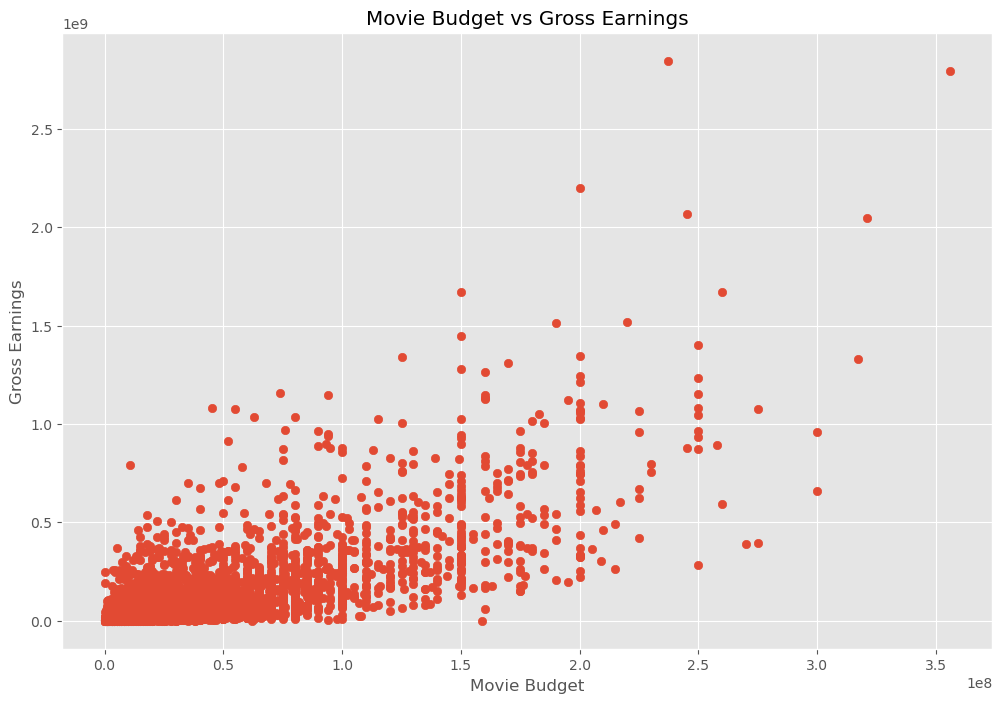

In [168]:
# Scatter plot: Correlation between Movie Budget and Gross Earnings 
plt.scatter(x=dataFrame['budget'], y=dataFrame['gross'])

plt.title('Movie Budget vs Gross Earnings')

plt.xlabel('Movie Budget')
plt.ylabel('Gross Earnings')

plt.show()

In [169]:
dataFrame.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox      162  
7445  2797501328         Marvel Studios      181  
3045  2201647264  Twentieth Century Fox      194  
6663  2069521700              Lucasfilm      138  
7244  2048359754         Marvel Studios      149

<Axes: xlabel='budget', ylabel='gross'>

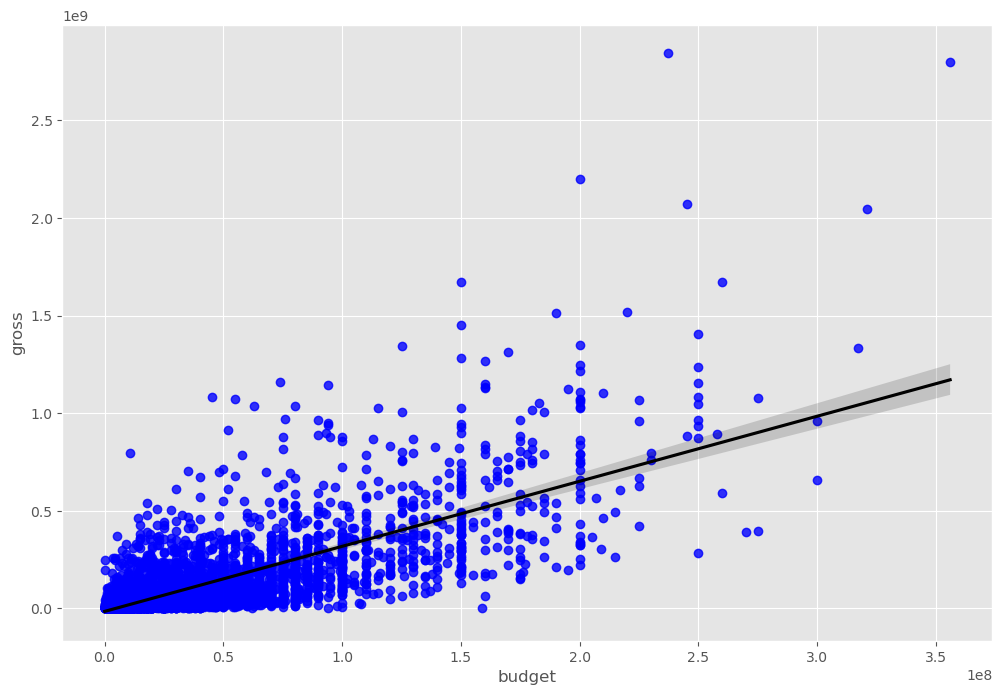

In [170]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y = 'gross', data = dataFrame, scatter_kws={"color": "blue"}, line_kws={"color": "black"})

<Axes: >

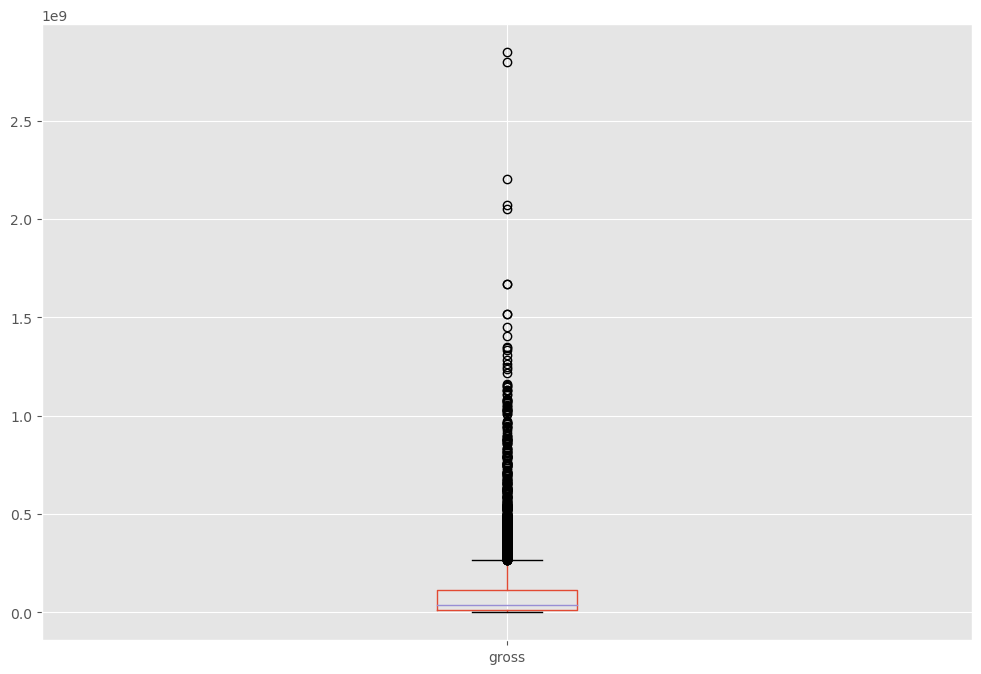

In [171]:
# Are there outliers ?

dataFrame.boxplot(column=['gross'])

In [172]:
# types of correlation pearson, kendall, and spearman

dataFrame.corr(method='pearson', numeric_only=True) # pearson

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

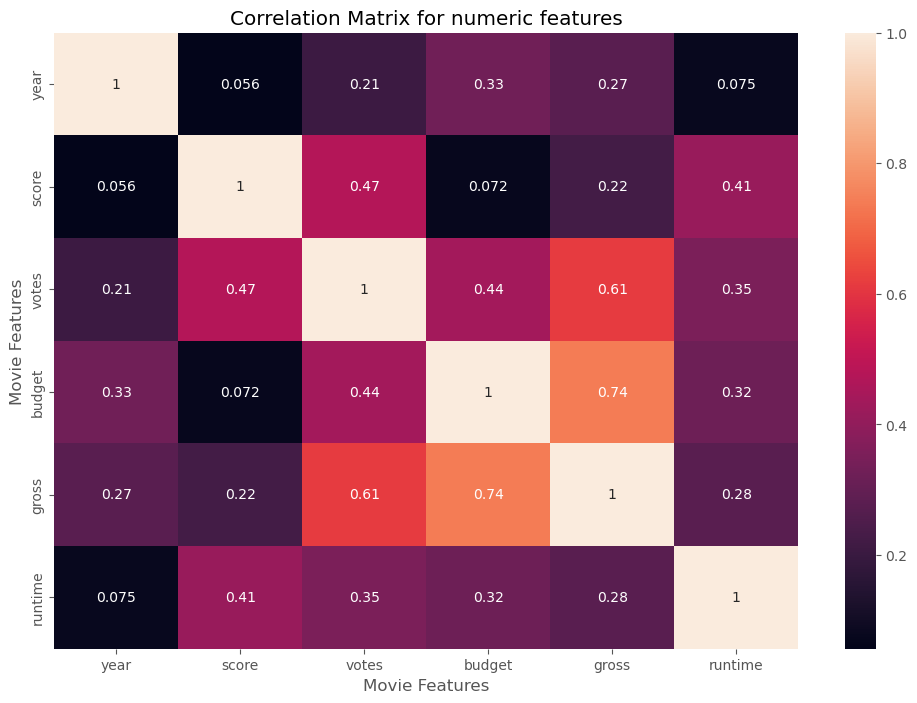

In [173]:
# visualization of pearson product moment correlation reveals a high correlation between movie budget and gross earnings

correlation_matrix = dataFrame.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show

Hypothesis one is confirmed. 

Employing Pearson Product Moment Correlation, It appears movie budget is highly correlated with Movie Gross Earnings.

The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

The statistical strength between movie budget and gross earning is 0.74.

### <b> Hypothesis Two </b>

* Movie production company will have a high correlation with Movie Gross Earnings

In [174]:
# Examine Movie production company

dataFrame.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score    votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime  
5445  2847246203  Twentieth Century Fox      162  
7445  2797501328         Marvel Studios      181  
3045  2201647264  Twentieth Century Fox      194  
6663  2069521700              Lucasfilm      138  
7244  2048359754         Marvel Studios      149

In [175]:
# Converting column with string datatype to numeric

df_numerized = dataFrame

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
        df_numerized

In [176]:
# comparing dataframes. row 5445 is commensurate with the numerized dataframe. 
dataFrame

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

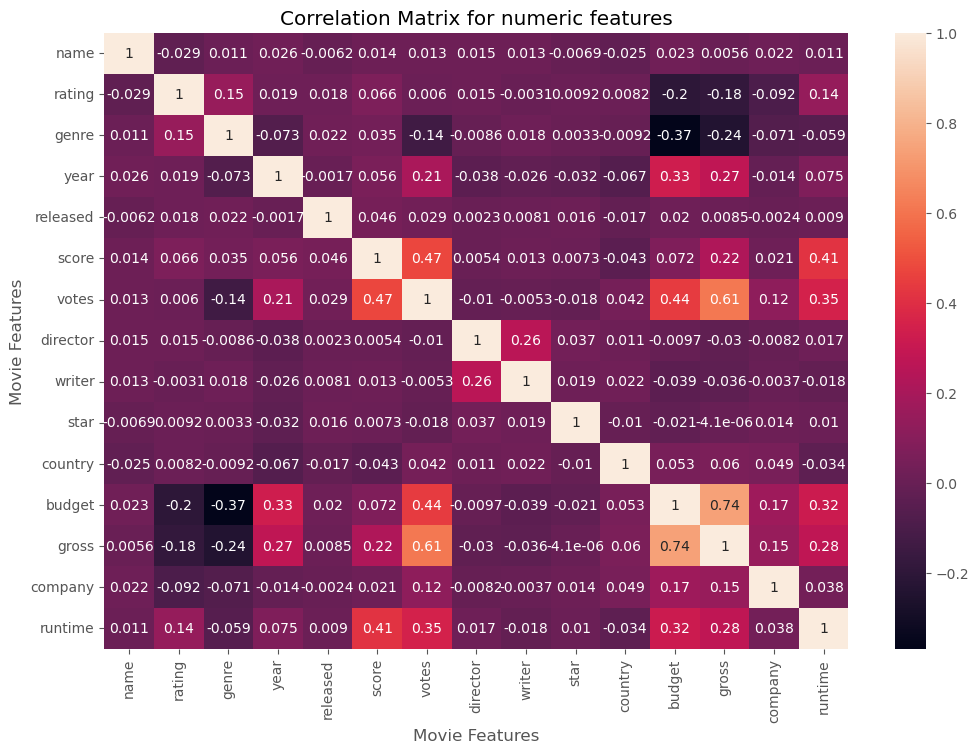

In [177]:
# Correlation Matrix for movie production company and gross earnings


correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot = True)

plt.title('Correlation Matrix for numeric features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [178]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name      1.000000 -0.029234  0.010996  0.025542 -0.006152  0.014450   
rating   -0.029234  1.000000  0.147796  0.019499  0.018083  0.065983   
genre     0.010996  0.147796  1.000000 -0.073167  0.022142  0.035106   
year      0.025542  0.019499 -0.073167  1.000000 -0.001740  0.056386   
released -0.006152  0.018083  0.022142 -0.001740  1.000000  0.045874   
score     0.014450  0.065983  0.035106  0.056386  0.045874  1.000000   
votes     0.012615  0.006031 -0.135990  0.206021  0.028833  0.474256   
director  0.015246  0.014656 -0.008553 -0.038354  0.002308  0.005413   
writer    0.012880 -0.003149  0.017578 -0.025908  0.008072  0.012843   
star     -0.006882  0.009196  0.003341 -0.032157  0.015706  0.007296   
country  -0.025490  0.008230 -0.009164 -0.066748 -0.017228 -0.043051   
budget    0.023392 -0.203946 -0.368523  0.327722  0.019952  0.072001   
gross     0.005639 -0.181906 -0.244101  0.274321  0.008501  0.222556   
company   0.021697 -0.092357 -0.071334 -0.014333 -0.002407  0.020656   
runtime   0.010850  0.140792 -0.059237  0.075077  0.008975  0.414068   

             votes  director    writer      star   country    budget  \
name      0.012615  0.015246  0.012880 -0.006882 -0.025490  0.023392   
rating    0.006031  0.014656 -0.003149  0.009196  0.008230 -0.203946   
genre    -0.135990 -0.008553  0.017578  0.003341 -0.009164 -0.368523   
year      0.206021 -0.038354 -0.025908 -0.032157 -0.066748  0.327722   
released  0.028833  0.002308  0.008072  0.015706 -0.017228  0.019952   
score     0.474256  0.005413  0.012843  0.007296 -0.043051  0.072001   
votes     1.000000 -0.010376 -0.005316 -0.017638  0.041551  0.439675   
director -0.010376  1.000000  0.261735  0.036593  0.011133 -0.009662   
writer   -0.005316  0.261735  1.000000  0.018520  0.022488 -0.039466   
star     -0.017638  0.036593  0.018520  1.000000 -0.009990 -0.021473   
country   0.041551  0.011133  0.022488 -0.009990  1.000000  0.052977   
budget    0.439675 -0.009662 -0.039466 -0.021473  0.052977  1.000000   
gross     0.614751 -0.029560 -0.035885 -0.000004  0.060078  0.740247   
company   0.118470 -0.008223 -0.003697  0.014082  0.048569  0.170235   
runtime   0.352303  0.017433 -0.017561  0.010108 -0.034477  0.318695   

             gross   company   runtime  
name      0.005639  0.021697  0.010850  
rating   -0.181906 -0.092357  0.140792  
genre    -0.244101 -0.071334 -0.059237  
year      0.274321 -0.014333  0.075077  
released  0.008501 -0.002407  0.008975  
score     0.222556  0.020656  0.414068  
votes     0.614751  0.118470  0.352303  
director -0.029560 -0.008223  0.017433  
writer   -0.035885 -0.003697 -0.017561  
star     -0.000004  0.014082  0.010108  
country   0.060078  0.048569 -0.034477  
budget    0.740247  0.170235  0.318695  
gross     1.000000  0.149553  0.275796  
company   0.149553  1.000000  0.037585  
runtime   0.275796  0.037585  1.000000

In [179]:
# compare highest correlation in matrix table

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [180]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

budget    genre      -0.368523
genre     budget     -0.368523
          gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
rating    budget     -0.203946
          gross      -0.181906
gross     rating     -0.181906
genre     votes      -0.135990
votes     genre      -0.135990
company   rating     -0.092357
rating    company    -0.092357
genre     year       -0.073167
year      genre      -0.073167
genre     company    -0.071334
company   genre      -0.071334
year      country    -0.066748
country   year       -0.066748
genre     runtime    -0.059237
runtime   genre      -0.059237
country   score      -0.043051
score     country    -0.043051
budget    writer     -0.039466
writer    budget     -0.039466
director  year       -0.038354
year      director   -0.038354
writer    gross      -0.035885
gross     writer     -0.035885
country   runtime    -0.034477
runtime   country    -0.034477
star      year       -0.032157
year      star       -0.032157
director

In [181]:
# We can now take a look at the ones that have a high correlation (> 0.5)

high_corr = sorted_pairs[abs(sorted_pairs) > 0.5]

print(high_corr)

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64


**Results**

Hypothesis 2 which stated that movie production company will have a high correlation with gross earnings is wrong. 

The correlation matrix reveals a low positive correlation between movie production company and gross earnings.

The statistical strength between movie production company and gross earning is 0.15. 



**Findings**

Movie votes have a high positive correlation with movie gross earnings

According to the correlation matrix, 

The statistical strength between movie votes and gross earning is 0.614